# SVR for ML-based prediction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/digital100.csv")

In [4]:
df.head()
#len(df)

,id,PeoplePerArea,LightingPerArea,EquipmentLoadPerArea,OperationalCarbon
0,0,8,6,10,108.29343
1,1,6,9,5,91.64994
2,2,1,4,5,54.97713
3,3,9,7,10,112.65078
4,4,1,9,3,61.71981


In [5]:
#Separate IVs and DVs
X = df[['PeoplePerArea','LightingPerArea','EquipmentLoadPerArea']]
y = df['OperationalCarbon']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## Split data and Random State

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
plt.style.use('seaborn')

In [ ]:
#Split the data
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state = 400)
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [8]:
from sklearn.svm import SVR
# Array of random_state values from 0 to 400
random_states = np.arange(start=0, stop=400)

# Initialize a list where we'll store the score of each random_state
scores = []

# Initialize search
for state in random_states:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=state)
    svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
    svr_linear.fit(X_train,y_train)
    scores.append(svr_linear.score(X_test, y_test))

results = pd.DataFrame({'random_state':random_states, 'score':scores})
RandomState_df = results[results['score'] == results['score'].max()]
RandomState = RandomState_df.iloc[0][0].astype(int)
print("The best Random State Value of this dataset is:", RandomState)

The best Random State Value of this dataset is: 267


## Learning Curve

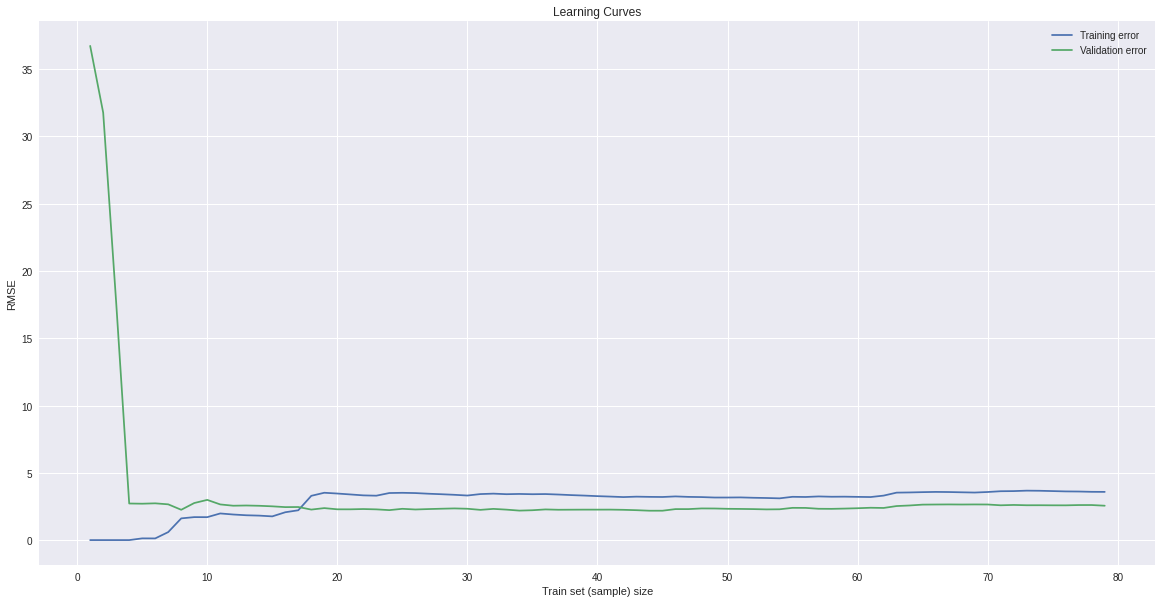

In [9]:
#Using the random state number for further learning curve and predictions
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=RandomState)

#Learning curve
# https://nvsyashwanth.github.io/machinelearningmaster/learning-curves/
regressor=LinearRegression()
regressor.fit(X_train,y_train)
predictions=regressor.predict(X_test)
plt.figure(1,figsize=(20,10))
train_errors=[]
val_errors=[]
for i in range(1,len(X_train)):
    regressor.fit(X_train[:i],y_train[:i])
    train_preds=regressor.predict(X_train[:i])
    val_preds=regressor.predict(X_test)
    train_errors.append(mse(train_preds,y_train[:i]))
    val_errors.append(mse(val_preds,y_test))
plt.plot(range(1,len(X_train)),np.sqrt(train_errors),label='Training error')
plt.plot(range(1,len(X_train)),np.sqrt(val_errors),label='Validation error')
plt.title('Learning Curves')    
plt.xlabel('Train set (sample) size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# 5/10 fold cross validation (k-fold)
## Cross-validation is usually used in machine learning for improving model prediction (c and epsion)
### We can do a grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved

Evaluating a Machine Learning model can be quite tricky. Usually, we split the data set into training and testing sets and use the training set to train the model and testing set to test the model. We then evaluate the model performance based on an error metric to determine the accuracy of the model. This method however, is not very reliable as the accuracy obtained for one test set can be very different to the accuracy obtained for a different test set. K-fold Cross Validation(CV) provides a solution to this problem by dividing the data into folds and ensuring that each fold is used as a testing set at some point. 

K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point. Lets take the scenario of 5-Fold cross validation(K=5). Here, the data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.

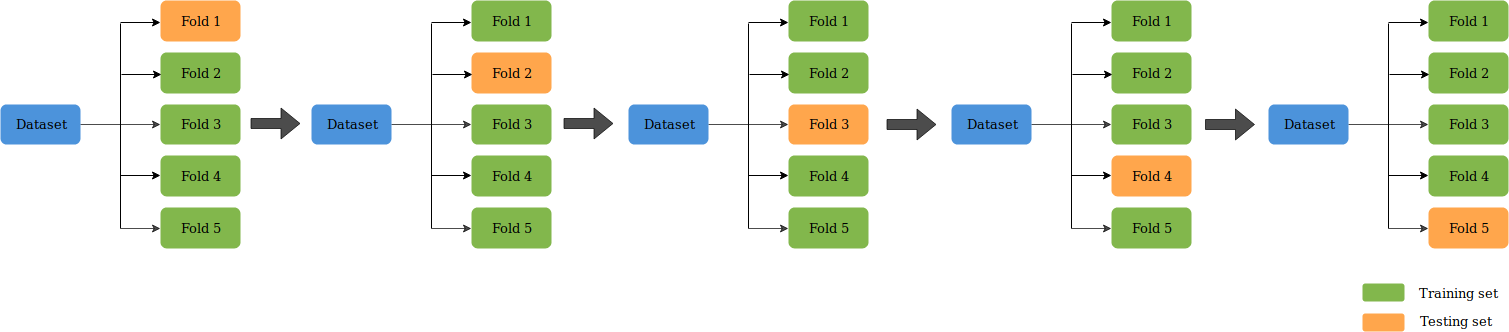

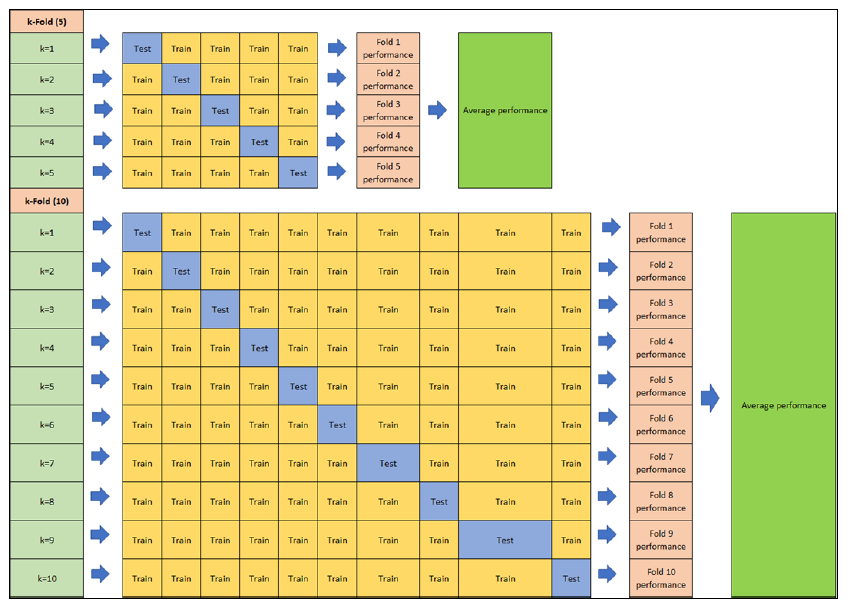

In [ ]:
# https://github.com/amanjayedi/Machine-Learning-with-Python/blob/master/Regression/Support%20Vector%20Regression.ipynb
# https://medium.datadriveninvestor.com/k-fold-cross-validation-6b8518070833
# https://scikit-learn.org/stable/modules/cross_validation.html
# https://www.statology.org/k-fold-cross-validation/

In [10]:
from sklearn.model_selection import GridSearchCV
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.3,0.4,0.5,1]}

In [11]:
#Selecting the kernel
svr_linear = SVR(kernel='linear')
#Select the folds (c) 
grid = GridSearchCV(svr_linear,param_grid=params,cv=10,scoring='r2',verbose=1,return_train_score=True)
grid.fit(X_train,np.ravel(y_train,order="c"))

Fitting 10 folds for each of 42 candidates, totalling 420 fits


GridSearchCV(cv=10, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [12]:
# Check which was deemed best estimator by the grid search
grid.best_estimator_

SVR(C=2, kernel='linear')

In [13]:
#Fit that estimator to the data
svr_best=SVR(kernel='linear',gamma='scale', C=0.1, epsilon=1)
svr_best.fit(X_train,np.ravel(y_train,order="c"))

SVR(C=0.1, epsilon=1, kernel='linear')

In [14]:
svr_best.score(X_test,y_test)

0.982964184780355

In [16]:
from sklearn.metrics import mean_squared_error 
print("RMSE for Linear kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))

#R-squared is a relative measure of fit, RMSE is an absolute measure of fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.
#result suggests that the data is bad fit. RMSE is too high
#Try to play with other input variables (adding variables is the main problem?), and compare your RMSE values. The smaller the RMSE value, the better the model.

RMSE for Linear kernelized SVR: 2.2490013062698573


# Final Prediction
### Use the random state, c and epsilon got from K-fold to improve the prediction result

In [17]:
y_train = y_train.values.astype(float)
y_train = y_train.reshape(-1,1)

In [30]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)

### ML-based prediction model

In [39]:
from sklearn.svm import SVR
import joblib

#automatically selecting c and epsilon
svr_linear = SVR(kernel='linear',gamma='scale', C=.1, epsilon=1)
#svr_linear.fit(X_train, y_train) 
svr_linear.fit(X_train,np.ravel(y_train,order="c"))

filename = "/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/SVM_model_DigitalTwin.joblib"
joblib.dump(svr_linear, filename)

['/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/SVM_model_DigitalTwin.joblib']

In [40]:
#Import prediction model
prediction_model = joblib.load(filename)
prediction_model

SVR(C=0.1, epsilon=1, kernel='linear')

## Validation

In [41]:
#rerun the prediction after getting the new c and epsilon values
y_pred = prediction_model.predict(X_test)
WriteData = pd.DataFrame({'Physics-based Modeling Results in lb-CO2/kWh':y_test, 'Machine Learning-based Modeling Results in lb-CO2/kWh':y_pred})
print(WriteData)

    Physics-based Modeling Results in lb-CO2/kWh  \
11                                      64.35078   
20                                      66.64779   
78                                      78.42264   
35                                      89.19768   
51                                     104.84826   
48                                      81.94992   
99                                      58.18563   
18                                      98.57892   
16                                      52.70910   
92                                      70.99065   
85                                     102.26145   
49                                      87.04074   
84                                      82.29078   
8                                       85.07010   
27                                      46.74405   
22                                      78.48957   
3                                      112.65078   
87                                      78.45231   
29          

In [42]:
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R_square = metrics.r2_score(y_test, y_pred)
# Printing the metrics
print('R2 square:',R_square)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.982964184780355
MAE:  1.8205619885399973
MSE:  5.058006875603525
RMSE:  2.2490013062698573


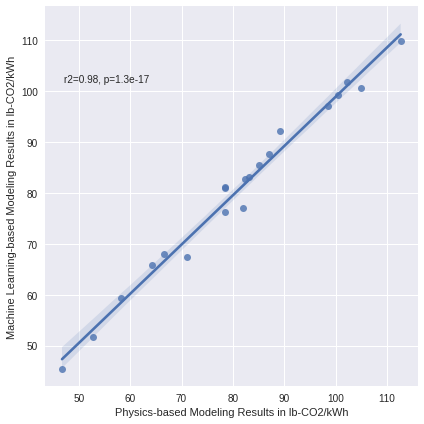

In [43]:
#Plot
import seaborn as sns
import scipy as sp

#tips = sns.load_dataset('tips')
# g = sns.lmplot(x='Real Values', y='Predicted Values', data=df, row='sex',
#                col='time', height=3, aspect=1)

g = sns.lmplot(x='Physics-based Modeling Results in lb-CO2/kWh', y='Machine Learning-based Modeling Results in lb-CO2/kWh', data=WriteData, height=6, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Physics-based Modeling Results in lb-CO2/kWh'], data['Machine Learning-based Modeling Results in lb-CO2/kWh'])
    ax = plt.gca() 
    ax.text(.05, .8, 'r2={:.2f}, p={:.2g}'.format(R_square, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()

## Import the real-time parameters for prediction

>From vivek



In [44]:
DataForPrediction = pd.read_csv("/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/PredictionModelData_DigitalTwin.csv")
DataForPrediction

,PeoplePerArea,LightingPerArea,EquipmentLoadPerArea
0,4,5,5
1,6,1,7
2,6,8,7
3,1,1,8
4,3,1,6
5,3,6,8
6,1,5,10
7,3,4,1
8,1,5,8
9,3,1,3


In [45]:
#Prediction using ML-based prediction model
prediction_realtime = prediction_model.predict(DataForPrediction)
prediction_realtime

array([ 70.90247771,  74.81019547,  91.90382396,  55.9994023 ,
        59.42292743,  76.75865223,  70.89318017,  53.9337928 ,
        65.76719001,  51.73394218,  69.56315715,  62.47401056,
        86.77783379,  78.10727033,  67.73034642,  73.59581848,
        53.07326275,  62.84645257,  65.8975357 ,  68.09738631,
        79.69798474,  77.13109424,  82.37273045,  80.42427368,
        99.1140187 ,  69.6842053 ,  74.56269704,  78.96390496,
        40.50038364, 114.12884473,  63.45558877])

# Write the data into csv file

In [46]:
WriteData_prediction = pd.DataFrame({'Prediction Results in lb-CO2/kWh':prediction_realtime})
print(WriteData_prediction)
#export the data in csv
WriteData_prediction.to_csv('/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/Prediction_realtime.csv', encoding='utf-8')

    Prediction Results in lb-CO2/kWh
0                          70.902478
1                          74.810195
2                          91.903824
3                          55.999402
4                          59.422927
5                          76.758652
6                          70.893180
7                          53.933793
8                          65.767190
9                          51.733942
10                         69.563157
11                         62.474011
12                         86.777834
13                         78.107270
14                         67.730346
15                         73.595818
16                         53.073263
17                         62.846453
18                         65.897536
19                         68.097386
20                         79.697985
21                         77.131094
22                         82.372730
23                         80.424274
24                         99.114019
25                         69.684205
2